# Generating Fake Entries Database

### Importing

In [2]:
import pandas as pd
import numpy as np
import json
import folium
import matplotlib.pyplot as plt
from IPython.display import clear_output
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="luisresende")

### Database Schemes

In [64]:
user_example = {
    'user_id': 'unique',
    'username': 'unique',
    'age': 'integer',
    'email': 'unique',
    'password': 'xxxxxx',
    'entries': []
}

entry_scheme = {
    '_id': 'unique',
    'user_id': 'unique',
    'mood': ['Horrível', 'Mau', 'Regular', 'Bem', 'Ótimo'],
    'diary': "React Navigation is made up of some core utilities and those are then used by navigators to create the navigation structure in your app. Don't worry too much about this for now, it'll become clear soon enough! To frontload the installation work, let's also install and configure dependencies used by most navigators, then we can move forward with starting to write some code. The libraries we will install now are react-native-screens and react-native-safe-area-context. If you already have these libraries installed and at the latest version, you are done here! Otherwise, read on.",
    'emotions': ['Adimiração', 'Amoroso', 'Animado', 'Compaixão', 'Alívio', 'Apreciação'],
    'date': '10-15-21',
    'time': '12:26',
    'address': 'Rua Doutor Celestino, 42 - Centro',
}

## Generating Date Range

In [7]:
dateList = [str(i.date()) for i in pd.date_range('2020-01-01', '2030-12-31', freq='D').tolist()]

dateRange_json = json.dumps(dateList, indent=4, ensure_ascii=True)

dateRange_js = 'const dateRange = ' + dateRange_json + '\nexport default dateRange;'

#### Saving date range list in .js format directly on mood-tracker-hybrid app project folder

In [8]:
js_file_len_onProjectFolder = open('../../../React-Native/Apps/mood-tracker-hybrid/shared/dateRange.js', 'w').write(dateRange_js)

In [6]:
print(dateList[-50:])

['2050-11-12', '2050-11-13', '2050-11-14', '2050-11-15', '2050-11-16', '2050-11-17', '2050-11-18', '2050-11-19', '2050-11-20', '2050-11-21', '2050-11-22', '2050-11-23', '2050-11-24', '2050-11-25', '2050-11-26', '2050-11-27', '2050-11-28', '2050-11-29', '2050-11-30', '2050-12-01', '2050-12-02', '2050-12-03', '2050-12-04', '2050-12-05', '2050-12-06', '2050-12-07', '2050-12-08', '2050-12-09', '2050-12-10', '2050-12-11', '2050-12-12', '2050-12-13', '2050-12-14', '2050-12-15', '2050-12-16', '2050-12-17', '2050-12-18', '2050-12-19', '2050-12-20', '2050-12-21', '2050-12-22', '2050-12-23', '2050-12-24', '2050-12-25', '2050-12-26', '2050-12-27', '2050-12-28', '2050-12-29', '2050-12-30', '2050-12-31']


## Generating Random Dates Inside Date Interval

In [65]:
def random_dates(start, end, n, unit='D'):

    ndays = (end - start).days + 1
    return pd.to_timedelta(np.random.rand(n) * ndays, unit=unit) + start

In [56]:
n_entries = 100

In [57]:
np.random.seed(None)
start = pd.to_datetime('2022-01-01')
end = pd.to_datetime('2022-01-18')
datetimes = random_dates(start, end, n_entries, unit='D').sort_values()

dates = pd.DatetimeIndex(np.array(datetimes, dtype='datetime64[D]'))
times = pd.DatetimeIndex(np.array(datetimes, dtype='datetime64[s]'))
times = [((str(i) if len(str(i))==2 else '0'+str(i)) if i<12 else (str(i-12) if len(str(i-12))==2 else '0'+str(i-12)))+':'+(str(j) if len(str(j))==2 else '0'+str(j))+(' AM' if i<12 else ' PM') for i, j in zip(times.hour, times.minute)]

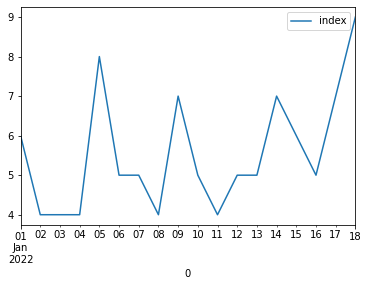

In [58]:
dates.to_frame().reset_index().groupby(0).count().plot()

## Generating Random Option Choices

In [59]:
user_ids = np.random.randint(1000, 9999, n_entries)
entry_ids = np.random.randint(1000, 9999, n_entries)

moods = [entry_scheme['mood'][i] for i in np.random.randint(0,5,n_entries)]
emotions = [[entry_scheme['emotions'][i] for i in np.random.randint(0,len(entry_scheme['emotions']), 3)] for j in range(n_entries)]
diaries = [' '.join(entry_scheme['diary'].split(' ')[i:]) for i in np.random.randint(10, len(entry_scheme['diary'].split(' ')), n_entries)]

## Searching Reference Address Coordinates

In [60]:
n_atempts = 20

In [61]:
for i in range(n_atempts):

    print(f'Attempts: {i+1}/{n_atempts}'); clear_output(wait=True)
    try: 
        location = geolocator.geocode("Belo Horizonte, MG")
        if not location:
            continue
        print('Localition Found!')
        break
    except:
        pass

location

Localition Found!


Location(Belo Horizonte, Região Geográfica Imediata de Belo Horizonte, Região Metropolitana de Belo Horizonte, Região Geográfica Intermediária de Belo Horizonte, Minas Gerais, Região Sudeste, 30170-110, Brasil, (-19.9227318, -43.9450948, 0.0))

## Setting Central Search Coords

In [61]:
lat_home = location.latitude
lng_home = location.longitude

In [62]:
print(lat_home, '\n', lng_home)

-19.9227318 
 -43.9450948


## Conversion degree to Km

Latitude: 1 deg = 110574 Km
Longitude: 1 deg = 111.320*cos(latitude) km

In [63]:
lat_km_in_deg = 1/110574
lng_km_in_deg = lambda lat: 1/(111320*np.cos(lat*np.pi/360))

## Generating Random Coordinates

In [70]:
np.random.seed(None)
search_range = 5000 # m

rand_lats = lat_home - lat_km_in_deg * search_range + np.random.random(500) * lat_km_in_deg * search_range * 2
rand_lngs = [lng_home - lng_km_in_deg(lat) * search_range + np.random.random() * lng_km_in_deg(lat) * search_range * 2 for lat in rand_lats]
rand_lngs = np.array(rand_lngs)

coords_df = pd.DataFrame({'lat': rand_lats, 'lng': rand_lngs})

In [71]:
coords_df.head()

,lat,lng
0,-19.942211,-43.973436
1,-19.880775,-43.900037
2,-19.885342,-43.982457
3,-19.917905,-43.970618
4,-19.891217,-43.959564


In [72]:
Map = folium.Map(location=(location.latitude, location.longitude), zoom_start=11, width='50%', height='50%')

for i in range(n_entries):
    
    folium.Marker(location=(date_df.loc[i, 'lat'], date_df.loc[i, 'lng']), popup=str(i)).add_to(Map)

Map

## Searching Fake Coordinates Addresses and Info

In [73]:
#coords_df.to_csv('random_coords_result.csv', index=False)
coords_df = pd.read_csv('random_coords_result.csv')

In [116]:
coords_df['location_obj'] = np.nan

res = {}
for j in coords_df.index:
    
    for i in range(n_atempts):

        print(f'{j}/{len(coords_df)} - {i+1}/{n_atempts}'); clear_output(wait=True)
        try: 
            new_location = geolocator.reverse(', '.join([str(coords_df.loc[j, 'lat']), str(coords_df.loc[j, 'lng'])]))
            if not new_location:
                continue
            print('Localition Found!')
            res[j] = new_location
            break
        except:
            pass

print('Search Completed')

Localition Found!
Search Completed


## Extracting location search result into columns

In [117]:
location_keys = ['place_id', 'lat', 'lon']
location_cols = ['place_id', 'place_lat', 'place_lng']
address_keys = ['road', 'house_number', 'neighbourhood', 'suburb', 'city', 'state', 'postcode', 'region', 'country']

for key, col in zip(location_keys, location_cols):
    coords_df[col] = np.nan

for key in address_keys:
    coords_df[key] = np.nan

for i in res.keys():
    
    clear_output(wait=True); print(f'{i+1}/{len(coords_df)}')
    
    for key, col in zip(location_keys, location_cols):
        if key in res[i].raw.keys():
            coords_df[col][i] = res[i].raw[key]

    for key in address_keys:
        if key in res[i].raw['address'].keys():
            coords_df[key][i] = res[i].raw['address'][key]

500/500


## Adding a 'address' column combining 'road', 'house_number', 'suburb' and 'city' columns

In [161]:
addresses = []
for i in coords_df.index:
    row = []
    for col in ['road', 'house_number', 'suburb', 'city']:
        if str(coords_df.loc[i, col])!='nan':
            if col=='house_number':
                row.append(str(int(coords_df.loc[i, col])))
            else:
                row.append(str(coords_df.loc[i, col]))
    
    addresses.append( ', '.join(row) )
                          
coords_df['address'] = addresses

## Saving Location Search Result

In [62]:
#coords_df.to_csv('random_coords_result.csv', index=False)
coords_df = pd.read_csv('random_coords_result.csv')

In [63]:
coords_df.head(3)

,lat,lng,place_id,place_lat,place_lng,road,suburb,city,state,postcode,country,neighbourhood,house_number,region,address
0,-19.942211,-43.973436,240680502.0,-19.942372,-43.973709,Rua Indiana,Jardim América,Belo Horizonte,Minas Gerais,30421-351,Brasil,NaN,NaN,Região Sudeste,"Rua Indiana, Jardim América, Belo Horizonte"
1,-19.880775,-43.900037,99487668.0,-19.880790,-43.899901,Rua Eros,NaN,Sabará,Minas Gerais,34700-100,Brasil,Alvorada,NaN,Região Sudeste,"Rua Eros, Sabará"
2,-19.885342,-43.982457,95725179.0,-19.885339,-43.982771,Rua Desembargador Paula Mota,Engenho Nogueira,Belo Horizonte,Minas Gerais,31320-020,Brasil,Engenho Nogueira,NaN,Região Sudeste,"Rua Desembargador Paula Mota, Engenho Nogueira..."


## Visualizing Location Search Result

In [174]:
Map = folium.Map(location=(lat_home, lng_home), zoom_start=14, width='50%', height='50%')

for i in coords_df.index:
        folium.Marker(location=(coords_df.loc[i, 'place_lat'], coords_df.loc[i, 'place_lng']), popup=coords_df.loc[i, 'address']).add_to(Map)

Map

## Final Fake Entries Database

In [68]:
ads = coords_df['address'].unique()
ads = [ads[i] for i in np.random.randint(0,len(ads),100)]

In [68]:
data_dict = {
    '_id': entry_ids,
    'user_id': [user_ids[0]]*100,
    'mood': moods,
    'diary': diaries,
    'emotions': emotions,
    'date': dates,
    'time': times,
    'address': ads,
}

In [70]:
Database = pd.DataFrame(data_dict)

## Generating Database for multiple users in json format

In [70]:
user_ids = range(100)

n_words = len(entry_scheme['diary'].split(' '))
ads_uni = np.unique(coords_df['address'])
start = pd.to_datetime('2022-01-20')
end = pd.to_datetime('2022-02-01')

np.random.seed(None)

In [71]:
users_json = {}
cnt=-1
for k, _id in enumerate(user_ids):
    
    print(f'{k+1}/{100}'); clear_output(wait=True)

#     entry_ids = np.random.randint(1000, 9999, 100)
    moods = [entry_scheme['mood'][i] for i in np.random.randint(0,5,100)]
    diaries = [' '.join(entry_scheme['diary'].split(' ')[i:]) for i in np.random.randint(n_words-30, n_words, 100)]
    emotions = [[entry_scheme['emotions'][i] for i in np.random.randint(0,len(entry_scheme['emotions']), 3)] for j in range(100)]

    datetimes = random_dates(start, end, 100, unit='D').sort_values()
    dates = pd.DatetimeIndex(np.array(datetimes, dtype='datetime64[D]'))
    times = pd.DatetimeIndex(np.array(datetimes, dtype='datetime64[s]'))
    times = [((str(i) if len(str(i))==2 else '0'+str(i)) if i<12 else (str(i-12) if len(str(i-12))==2 else '0'+str(i-12)))+':'+(str(j) if len(str(j))==2 else '0'+str(j))+(' AM' if i<12 else ' PM') for i, j in zip(times.hour, times.minute)]

    ads = [ads_uni[i] for i in np.random.randint(0,len(ads_uni),100)]
    
    user_entries = []
    for l in range(100):
        cnt+=1
        user_entries.append({
            '_id': str(cnt),
            'user_id': str(_id),
            'mood': moods[l],
            'diary': diaries[l],
            'emotions': emotions[l],
            'date': str(dates[l]).split()[0],
            'time': times[l],
            'address': ads[l],
        })
    
    users_json[str(_id)] = user_entries

100/100


In [72]:
users_json['0'][0]

{'_id': '0',
 'user_id': '0',
 'mood': 'Bem',
 'diary': 'libraries installed and at the latest version, you are done here! Otherwise, read on.',
 'emotions': ['Compaixão', 'Apreciação', 'Animado'],
 'date': '2022-01-20',
 'time': '08:53 AM',
 'address': 'Rua 4 de Maio, Chácara Leonina, Belo Horizonte'}

## Saving Database in json format

In [73]:
users_str = json.dumps(users_json, indent=4, ensure_ascii=True)

file_len = open('Database.json', 'w')
file_len.write(users_str)
file_len.close()

In [74]:
print('JSON File Database:\n', users_str[:500])

JSON File Database:
 {
    "0": [
        {
            "_id": "0",
            "user_id": "0",
            "mood": "Bem",
            "diary": "libraries installed and at the latest version, you are done here! Otherwise, read on.",
            "emotions": [
                "Compaix\u00e3o",
                "Aprecia\u00e7\u00e3o",
                "Animado"
            ],
            "date": "2022-01-20",
            "time": "08:53 AM",
            "address": "Rua 4 de Maio, Ch\u00e1cara Leonina, Belo Horizonte"
    


## Saving Complete Database in .js format 

In [75]:
print('const data = ' + users_str[:30])
print('...\n')
print(users_str[-30:] + '\nexport default data;')

const data = {
    "0": [
        {
       
...

o Horizonte"
        }
    ]
}
export default data;


In [76]:
users_js = 'const data = ' + users_str + '\nexport default data;'

In [77]:
#js_file_len = open('Database.js', 'w').write(users_js)

## Saving Reduced Database in .js format

In [81]:
users_json_red = {}
for key in users_json.keys():
    users_json_red[key] = list(np.random.choice(users_json[key], np.random.randint(30, 100, 1)[0]))

users_str_red = json.dumps(users_json_red, indent=4, ensure_ascii=True)
users_js_red = 'const data = ' + users_str_red + '\nexport default data;'

In [82]:
file_len = open('DatabaseReduced.js', 'w')
file_len.write(users_js_red)
file_len.close()

#### Saving reduced database in .js format directly on mood-tracker-hybrid app project folder

In [83]:
#js_file_len_onProjectFolder = open('../../../../React-Native/Apps/mood-tracker-hybrid/shared/DatabaseReduced.js', 'w').write(users_js_red)

## Saving Database to csv Table

In [207]:
dfs = []
for key in users_json:
    
    df = pd.DataFrame(users_json[key]); df['user_id'] = key
    dfs.append(df)
    
Database_csv = pd.concat(dfs, 0)

In [232]:
#Database_csv.to_csv('Database.csv')

Database_csv.head()

,_id,user_id,mood,diary,emotions,date,time,address
0,0,0,Bem,"done here! Otherwise, read on.","[Compaixão, Adimiração, Adimiração]",2022-01-01,01:11 AM,"Rua Santa Catarina, Lourdes, Belo Horizonte"
1,1,0,Regular,install now are react-native-screens and react...,"[Apreciação, Adimiração, Adimiração]",2022-01-01,06:43 AM,"Rua Rodrigues Caldas, 30, Santo Agostinho, Bel..."
2,2,0,Ótimo,you already have these libraries installed and...,"[Apreciação, Alívio, Alívio]",2022-01-01,03:48 PM,"Avenida Dom Pedro II, 2964, Carlos Prates, Bel..."
3,3,0,Bem,"installed and at the latest version, you are d...","[Amoroso, Adimiração, Adimiração]",2022-01-01,10:01 PM,"Rua Alvarenga Peixoto, Santo Agostinho, Belo H..."
4,4,0,Horrível,will install now are react-native-screens and ...,"[Apreciação, Adimiração, Amoroso]",2022-01-01,11:23 PM,"Rua Conde Ribeiro do Vale, Sagrada Família, Be..."


In [231]:
Database_csv['date'].unique()

array(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
       '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
       '2022-01-09', '2022-01-10', '2022-01-11', '2022-01-12',
       '2022-01-13', '2022-01-14', '2022-01-15', '2022-01-16',
       '2022-01-17', '2022-01-18'], dtype=object)